In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sys.path.append("../src/")
from tinyshap import SHAPExplainer

## Get the data

In [24]:
dataset = load_diabetes()
X = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
y = dataset["target"]

X.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train a regression model

In [26]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

## Explain all predictions

In [27]:
X_train_summary = pd.DataFrame(KMeans(n_clusters=10, n_init="auto").fit(X_train).cluster_centers_, columns=X.columns)

In [28]:
explainer = SHAPExplainer(model.predict, X=X_train_summary)

In [29]:
contributions = explainer.shap_values(X)
contributions.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,avg_prediction
0,-0.252877,-2.739115,21.608247,-6.202314,-16.225904,3.307320,13.199100,-1.583147,12.151860,-13.991986,179.430164
1,2.870599,12.134076,-36.993598,-3.014082,-1.229703,1.070297,-20.815163,9.542175,-43.234422,-3.673991,155.418420
2,-6.285854,-5.166234,16.439180,-9.528049,-5.623036,11.490931,4.387877,1.245902,-4.196633,8.599717,155.198579
3,14.790337,22.847675,-16.341421,-8.182573,-0.289521,1.867487,6.467995,2.724143,31.148698,1.529346,162.787955
4,-2.784043,12.161535,-31.587080,-1.977557,1.841373,0.650110,-3.751432,-0.224725,-13.517527,2.007437,154.861752


## Dependence plot

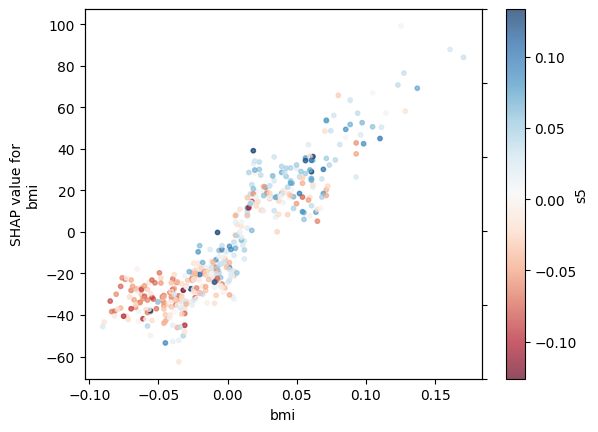

In [30]:
feature_name_1 = "bmi"
feature_name_2 = "s5"

fig, ax = plt.subplots()

h= ax.scatter(X[feature_name_1], contributions[feature_name_1], s=10, alpha=0.7, c=X[feature_name_2], cmap="RdBu")
fig.colorbar(h)
ax.set_xlabel(feature_name_1)
ax.set_ylabel(f"SHAP value for\n{feature_name_1}")
ax2 = ax.twinx()
ax2.set_yticklabels([])
ax2.set_ylabel(feature_name_2, labelpad=60)
plt.show()